In [1]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from IPython.display import Image, display
import matplotlib.pyplot as plt
# from IPython.display import Image, display

In [2]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    treefiles = glob.glob(f'{directory}*tree_*')
    num_trees_per_strat = len(treefiles)
    for i in range(0, int(num_trees_per_strat)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
#             print(dot_string)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
            
def show_stats(directory):
    fs = glob.glob(f'{directory}*experiment_stats')
    dfs = []
    for f in fs:
        one_entry_df = pd.read_csv(f)
        one_entry_df['fname']= f
        dfs.append(one_entry_df)
    df = pd.concat(dfs)
    return df

def determine_shape(x, shape_assignment_dict):
    return shape_assignment_dict[x]

def determine_color(x, color_assignment_dict):
    return color_assignment_dict[x]

def scatter_plots(df, x, y, xlabel, ylabel, title, shape_assignment_dict, color_assignment_dict,
                 first_legend_pos, second_legend_pos, strat_legend_rel_pos, ratio_legend_re_pos):
        
    fig, ax = plt.subplots()
    groups = df.groupby(['strat','complaint_ratio'])
    # Create a scatter plot for each group based on shape and color
    for (strat, ratio), group in groups:
        marker = shape_assignment_dict.get(strat)
        color=color_assignment_dict.get(ratio)
        ax.scatter(group[x], group[y], marker=marker, color=color, label=(strat, ratio))

    # Create separate shape and color legends
    legend_elements_1 = []
    legend_elements_2 = []

    for shape, marker in shape_assignment_dict.items():
        legend_elements_1.append(plt.Line2D([0], [0], marker=marker, color='w', label=shape, markerfacecolor='k'))
    for ratio, color in color_assignment_dict.items():
        legend_elements_2.append(plt.Line2D([0], [0], marker='o', color='w', label=ratio, markerfacecolor=color))

    # Add shape and color legends
    first_legend=ax.legend(handles=legend_elements_1, loc=first_legend_pos, 
                           bbox_to_anchor=strat_legend_rel_pos,
                           title='strategy', 
                           fontsize=13,title_fontsize=14)
    ax.legend(handles=legend_elements_2, loc=second_legend_pos, 
              bbox_to_anchor=ratio_legend_re_pos, title='complaint%',
              fontsize=13, title_fontsize=14)

    ax.add_artist(first_legend)

    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)

    plt.show()
    plt.close(fig)

    
def line_plots(df, x, y, xlabel, ylabel, title, color_assignment_dict, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
        color = color_assignment_dict.get(strat)
        ax.plot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.savefig(f'graph_pdfs/{title}.pdf', format='pdf')
    plt.show()
    plt.close(fig)
#     return plt

def box_plot(df, x, y, xlabel, ylabel, title, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
#         color = color_assignment_dict.get(strat)
        ax.boxplot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.show()
    plt.close(fig)
#     return plt

In [3]:
# df=show_stats('../exp_710_repeated/')
# df=show_stats('../exp_725_repeated/')
df=show_stats('../exp_727_repeated_320/')
# exp_727_repeated_320


In [9]:
df_brute = show_stats('../exp_801_repeated/')

In [10]:
df_brute

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,fname
0,brute_force,0.176,0.933333,4,36,0.821,0.000,1.000,0.819,1411,1411,30,0.0,30,29,False,False,../exp_801_repeated/20230801213157_experiment_stats
0,brute_force,0.159,1.000000,4,36,0.821,0.500,0.972,0.824,1411,1411,30,0.3,30,29,False,False,../exp_801_repeated/20230801213208_experiment_stats
0,brute_force,1.455,0.857143,4,36,0.821,0.750,0.778,0.703,1411,1317,30,0.5,28,29,False,False,../exp_801_repeated/20230801213218_experiment_stats
0,brute_force,0.183,0.000000,4,36,0.821,1.000,0.917,0.660,1411,818,30,0.7,16,29,False,False,../exp_801_repeated/20230801213230_experiment_stats
0,brute_force,42.271,1.133333,12,28,0.821,0.417,0.964,0.814,1411,1411,30,0.0,30,29,False,False,../exp_801_repeated/20230801213240_experiment_stats
0,brute_force,8.931,1.600000,12,28,0.821,0.667,0.893,0.822,1411,1411,30,0.3,30,29,False,False,../exp_801_repeated/20230801213338_experiment_stats
0,brute_force,0.913,1.142857,12,28,0.821,0.500,1.000,0.800,1411,1292,30,0.5,28,29,False,False,../exp_801_repeated/20230801213358_experiment_stats
0,brute_force,1.883,0.000000,12,28,0.821,1.000,0.929,0.762,1411,516,30,0.7,12,29,False,False,../exp_801_repeated/20230801213410_experiment_stats
0,brute_force,198.129,1.600000,20,20,0.821,0.350,1.000,0.862,1411,1411,30,0.0,30,29,False,False,../exp_801_repeated/20230801213422_experiment_stats
0,brute_force,0.166,1.333333,20,20,0.821,0.200,1.000,0.828,1411,1411,30,0.3,30,29,False,False,../exp_801_repeated/20230801213811_experiment_stats


../exp_801_repeated/20230801213240_tree_brute_force_11_dot_file


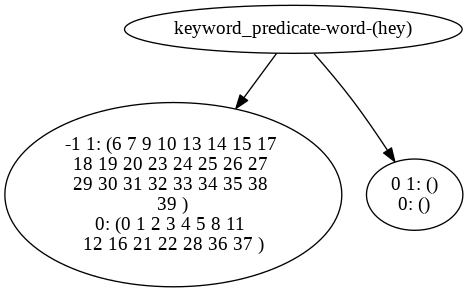



../exp_801_repeated/20230801213240_tree_brute_force_13_dot_file


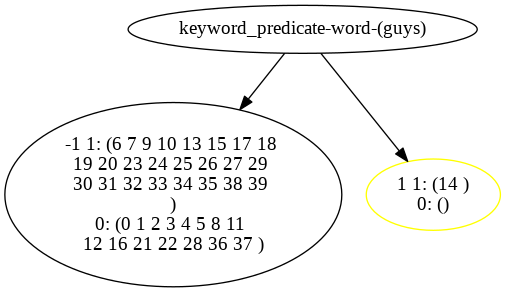



../exp_801_repeated/20230801213240_tree_brute_force_15_dot_file


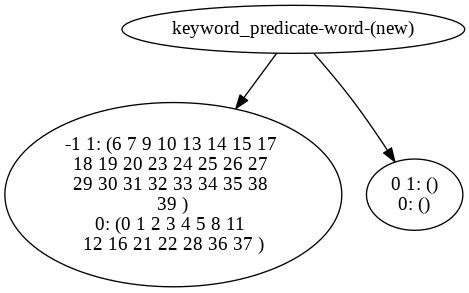



../exp_801_repeated/20230801213240_tree_brute_force_146_dot_file


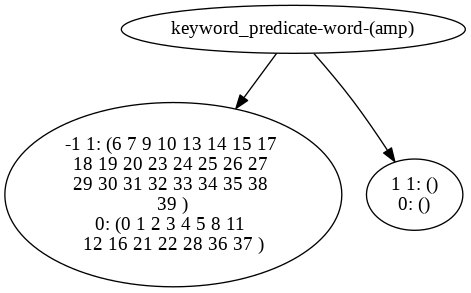



../exp_801_repeated/20230801213240_tree_brute_force_161_dot_file


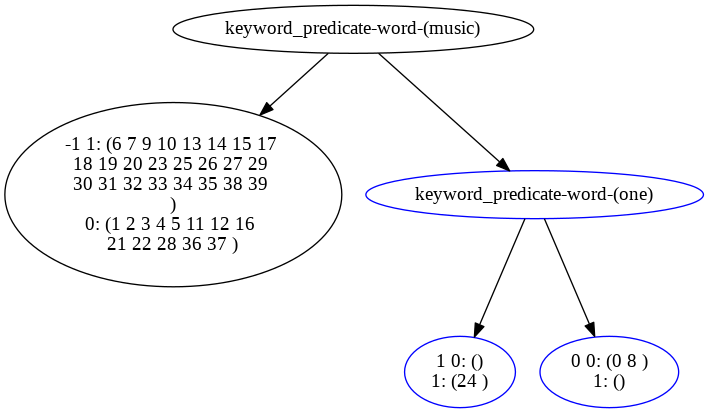



../exp_801_repeated/20230801213240_tree_brute_force_29_dot_file


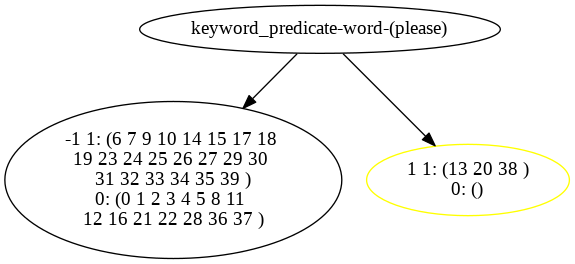



../exp_801_repeated/20230801213240_tree_brute_force_216_dot_file


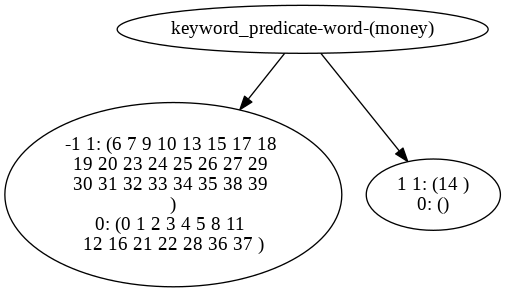



../exp_801_repeated/20230801213240_tree_brute_force_225_dot_file


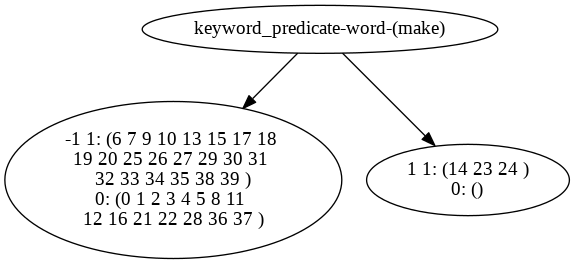



../exp_801_repeated/20230801213240_tree_brute_force_228_dot_file


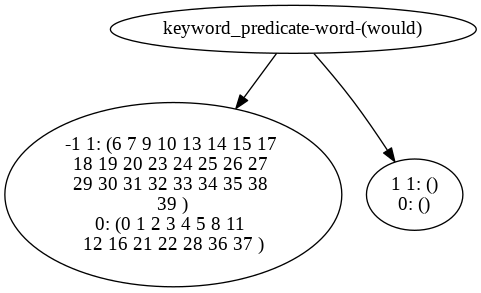



../exp_801_repeated/20230801213240_tree_brute_force_239_dot_file


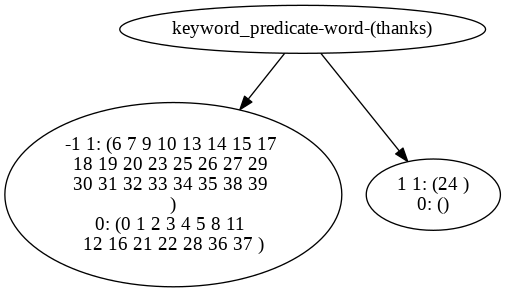



../exp_801_repeated/20230801213240_tree_brute_force_259_dot_file


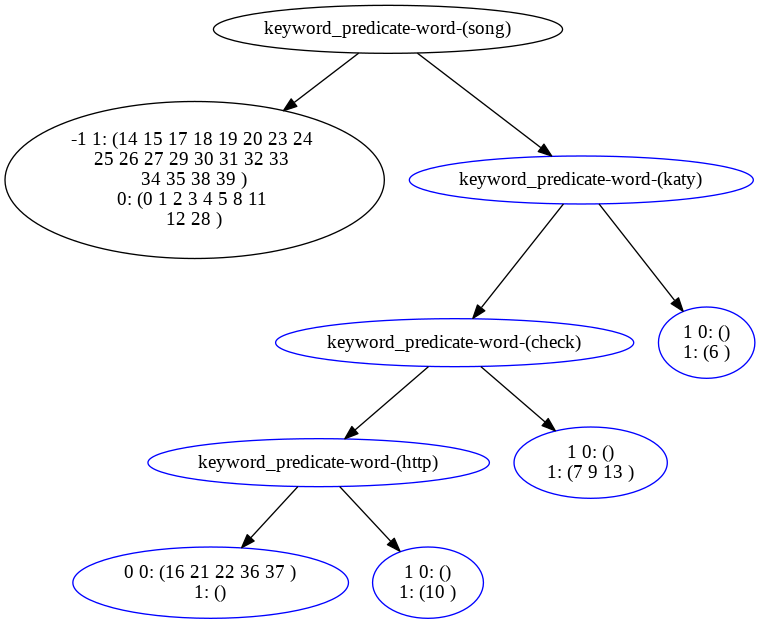



../exp_801_repeated/20230801213240_tree_brute_force_284_dot_file


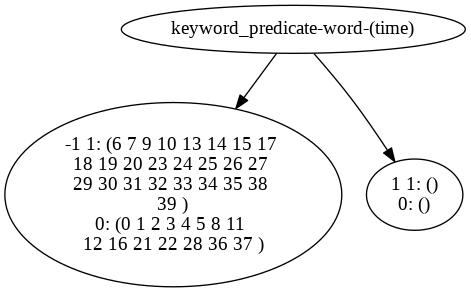



../exp_801_repeated/20230801213240_tree_brute_force_35_dot_file


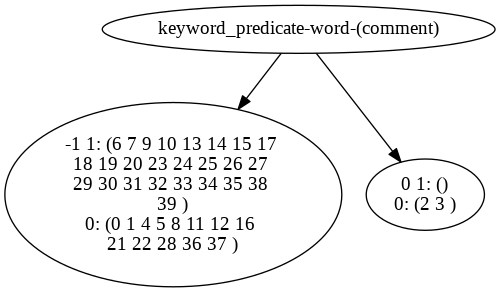



../exp_801_repeated/20230801213240_tree_brute_force_37_dot_file


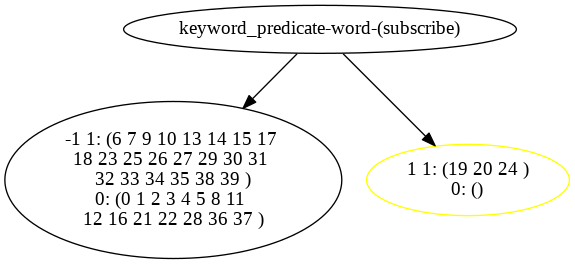



../exp_801_repeated/20230801213240_tree_brute_force_300_dot_file


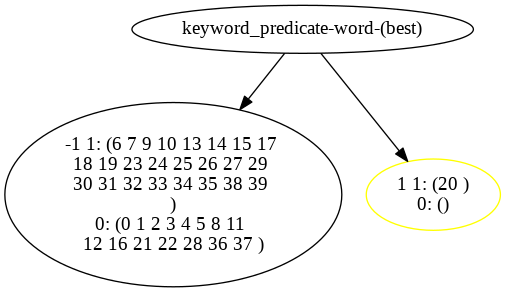



../exp_801_repeated/20230801213240_tree_brute_force_325_dot_file


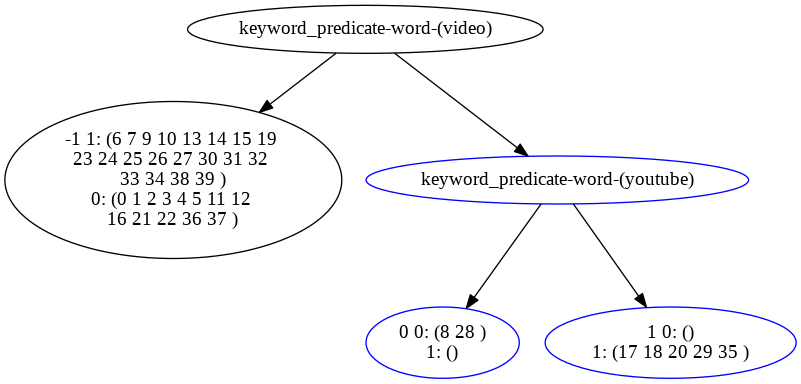



../exp_801_repeated/20230801213240_tree_brute_force_330_dot_file


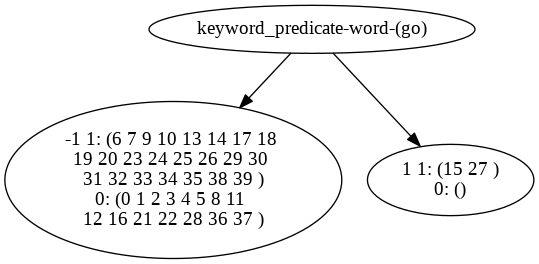



../exp_801_repeated/20230801213240_tree_brute_force_331_dot_file


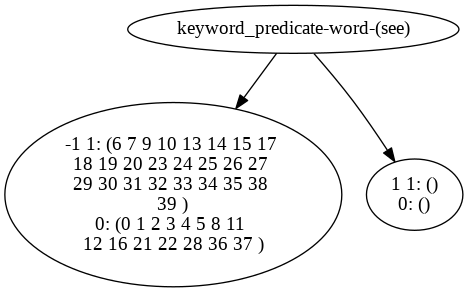



../exp_801_repeated/20230801213240_tree_brute_force_43_dot_file


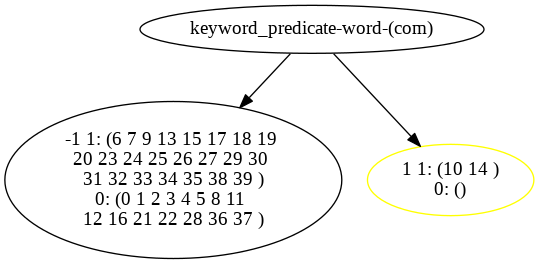



../exp_801_repeated/20230801213240_tree_brute_force_426_dot_file


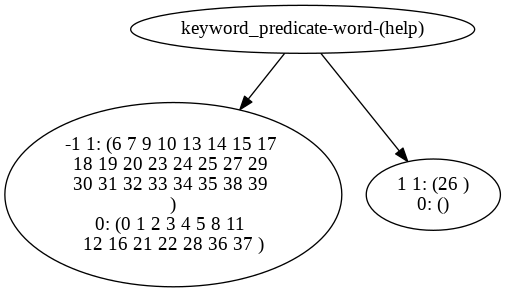



../exp_801_repeated/20230801213240_tree_brute_force_435_dot_file


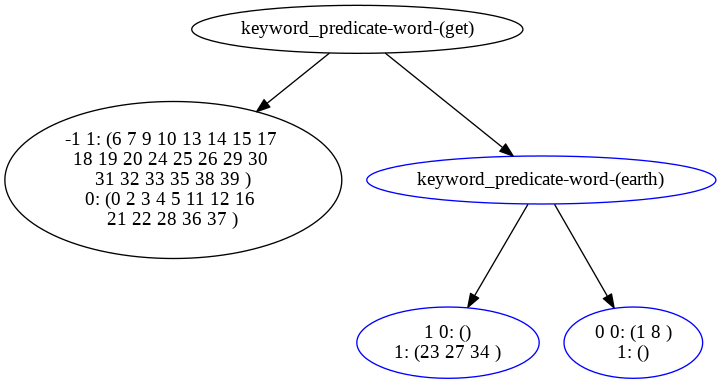



../exp_801_repeated/20230801213240_tree_brute_force_5_dot_file


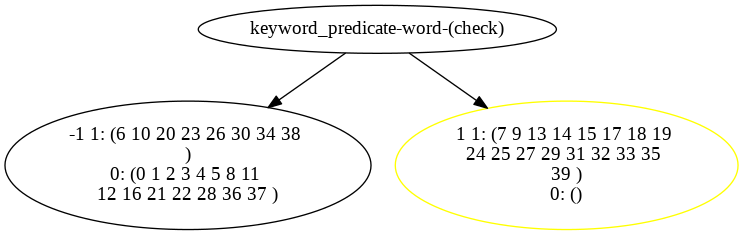



../exp_801_repeated/20230801213240_tree_brute_force_53_dot_file


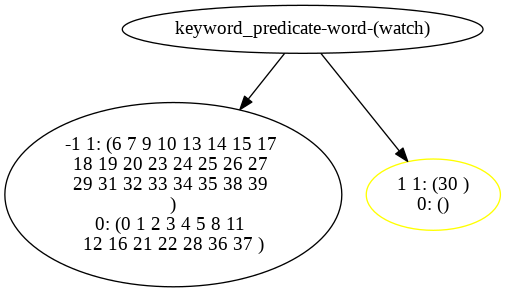



../exp_801_repeated/20230801213240_tree_brute_force_578_dot_file


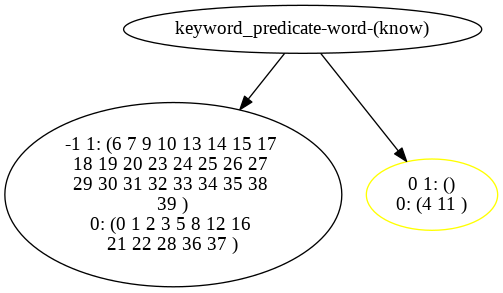



../exp_801_repeated/20230801213240_tree_brute_force_597_dot_file


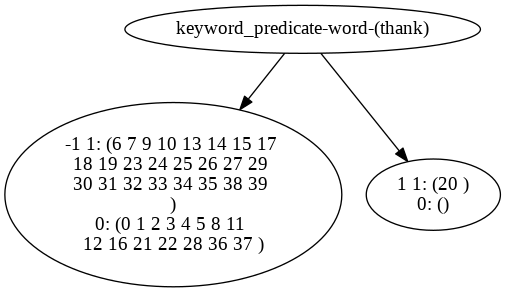



../exp_801_repeated/20230801213240_tree_brute_force_75_dot_file


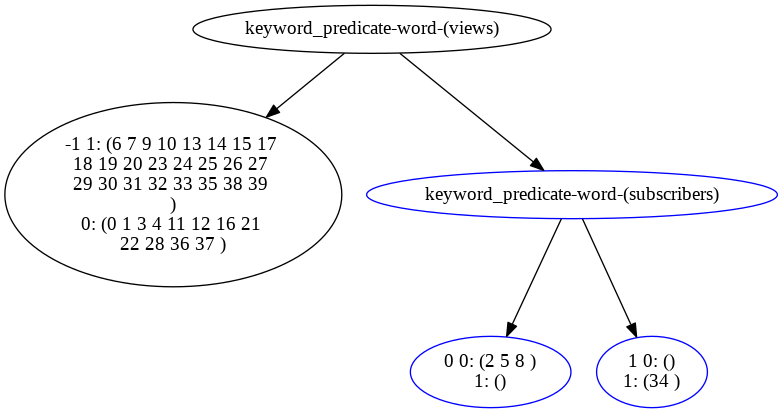



../exp_801_repeated/20230801213240_tree_brute_force_78_dot_file


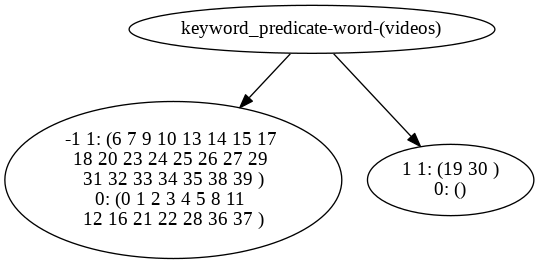



../exp_801_repeated/20230801213240_tree_brute_force_79_dot_file


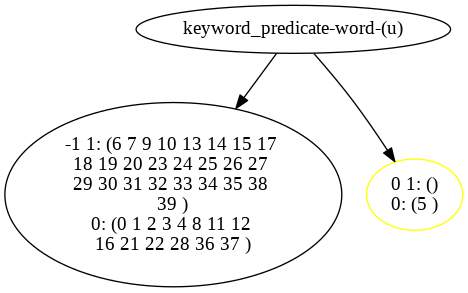



../exp_801_repeated/20230801213240_tree_brute_force_759_dot_file


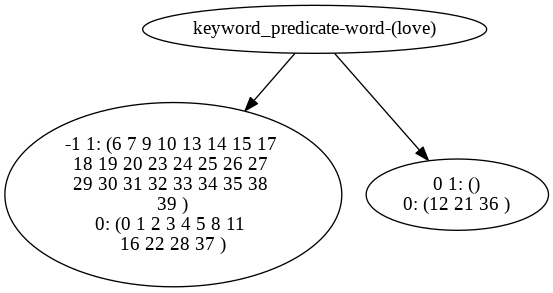



../exp_801_repeated/20230801213240_tree_brute_force_9_dot_file


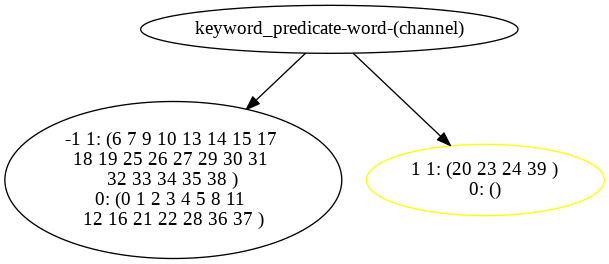



../exp_801_repeated/20230801213240_tree_brute_force_11_dot_file


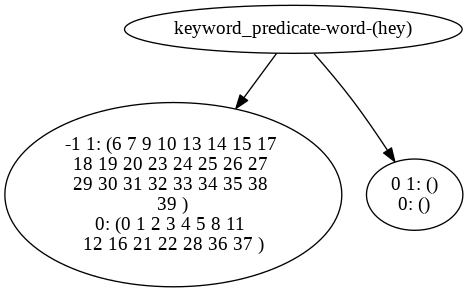



../exp_801_repeated/20230801213240_tree_brute_force_13_dot_file


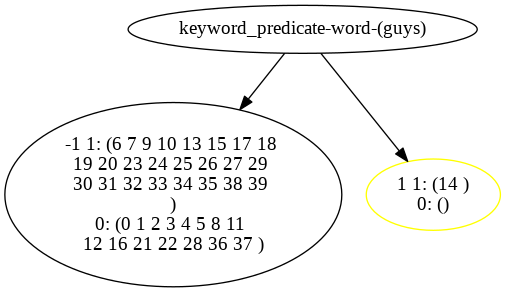



../exp_801_repeated/20230801213240_tree_brute_force_146_dot_file


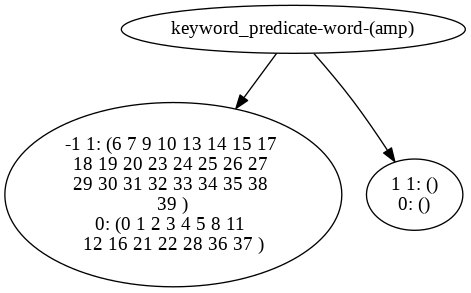



../exp_801_repeated/20230801213240_tree_brute_force_15_dot_file


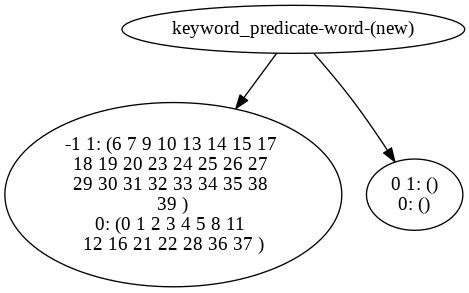



../exp_801_repeated/20230801213240_tree_brute_force_161_dot_file


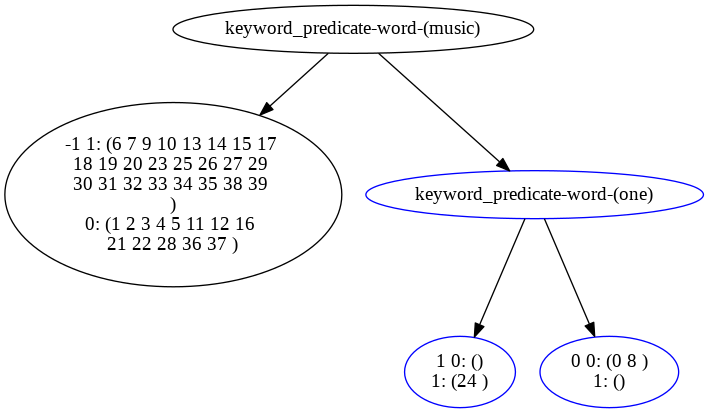



../exp_801_repeated/20230801213240_tree_brute_force_216_dot_file


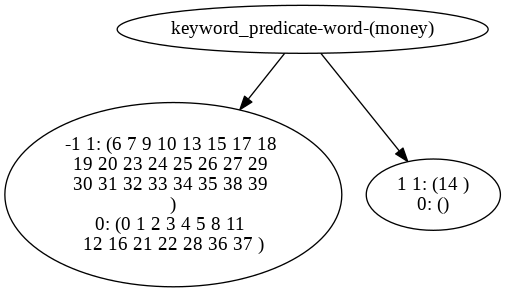



../exp_801_repeated/20230801213240_tree_brute_force_225_dot_file


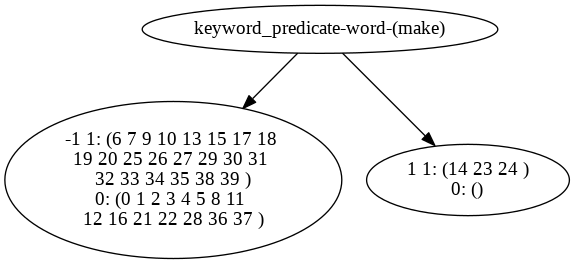



../exp_801_repeated/20230801213240_tree_brute_force_228_dot_file


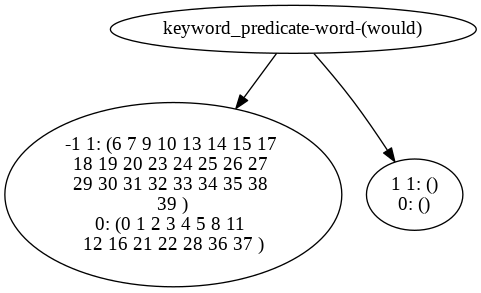



../exp_801_repeated/20230801213240_tree_brute_force_239_dot_file


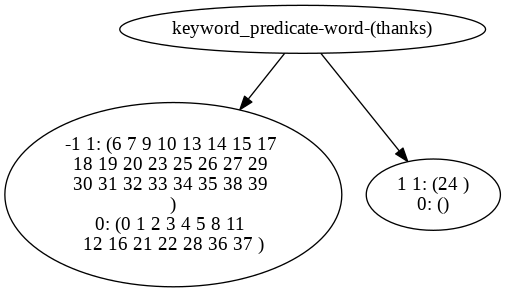



../exp_801_repeated/20230801213240_tree_brute_force_259_dot_file


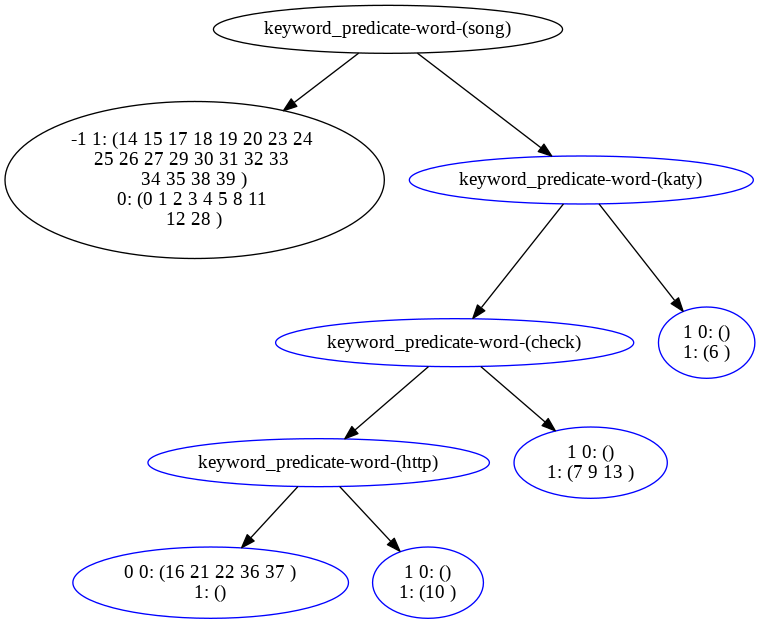



../exp_801_repeated/20230801213240_tree_brute_force_284_dot_file


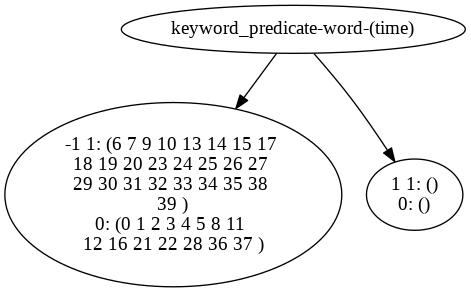



../exp_801_repeated/20230801213240_tree_brute_force_29_dot_file


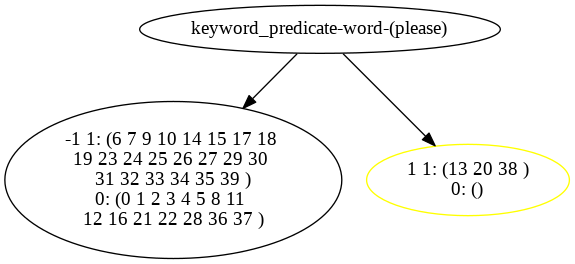

In [8]:
show_trees('../exp_801_repeated/20230801213240')

In [194]:
fs.sort()

In [195]:
fs[0]

'../exp_727_repeated_320/20230728061824_experiment_stats'

In [196]:
fs[-1]

'../exp_727_repeated_320/20230731131854_experiment_stats'

In [197]:
df.shape

(5000, 18)

In [198]:
# df1 = show_stats('../exp_repeat_320_only/')


In [199]:
# show_trees('../exp_repeat_320_only/')

In [200]:
df.head()

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,fname
0,information_gain,3.391,4.400000,32,288,0.821,0.781,0.993,0.899,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061824_experiment_stats
0,naive,0.922,23.866667,32,288,0.821,0.969,1.000,0.895,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061839_experiment_stats
0,information_gain,6.405,8.466667,96,224,0.821,0.823,1.000,0.933,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061851_experiment_stats
0,naive,0.988,28.333333,96,224,0.821,0.958,1.000,0.884,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061908_experiment_stats
0,information_gain,4.889,8.866667,160,160,0.821,0.781,0.988,0.925,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061921_experiment_stats


In [201]:
df=df.sort_values(by='fname')


In [202]:
df.shape

(5000, 18)

In [203]:

df['strat'] = df['strat'].str.replace('information_gain', 'decision tree')
df['user_input_size'] = df['num_complaints'] + df['confirmation_cnt']
df['complaint_ratio'] = df['num_complaints']/df['user_input_size']
df['complaint_ratio'] = df['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df['accuracy_improvement'] = df['new_global_accuracy']/df['global_accuracy']

In [204]:
df.shape

(5000, 21)

In [205]:
df_no_deletion=df[df['deletion_factor']==0]
df_deletion=df[df['complaint_ratio']=='50.00%']

In [206]:
df1=df_no_deletion.head(1000)
df2=df_no_deletion.head(2000)
df3=df_no_deletion.head(3000)
df4=df_no_deletion.head(4000)
df5=df_no_deletion.head(5000)

In [207]:
import seaborn as sns

In [208]:
def boxplot(df, x, y, group_name, group_value, xlabel, ylabel, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    df=df[df[group_name]==group_value]
    strat_list = list(df['strat'].unique())
    strat_list.sort()
    sns.boxplot(data=df, x=x, y=y, hue='strat', hue_order=strat_list)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"graph_pdfs/box_{title}.pdf", format="pdf")
    plt.show()
#     plt.close(fig)

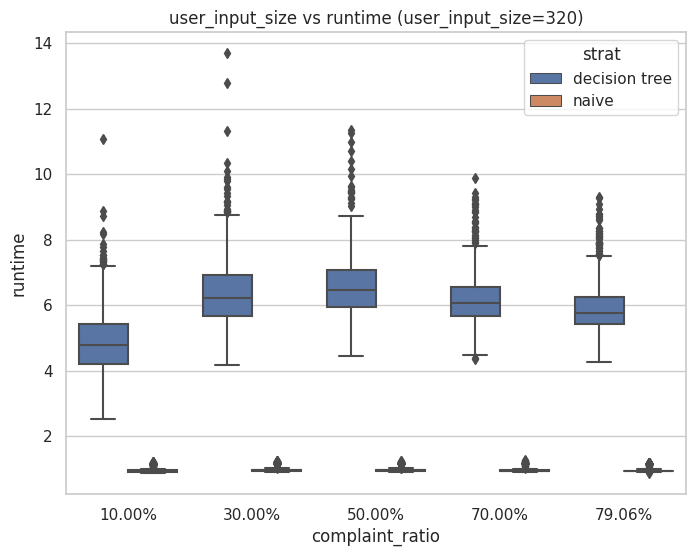

In [209]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df_no_deletion,x="complaint_ratio",y="runtime",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="complaint_ratio", ylabel="runtime", 
            title=f'user_input_size vs runtime (user_input_size={input_size})')

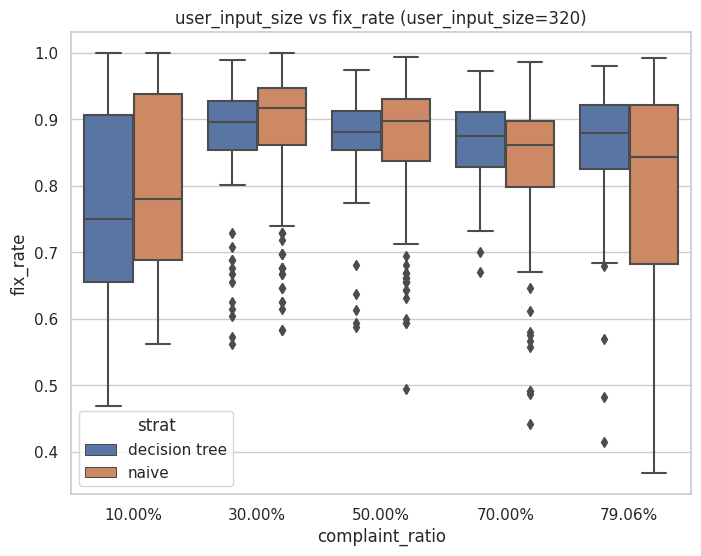

In [210]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df1,x="complaint_ratio",y="fix_rate",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="complaint_ratio", ylabel="fix_rate", 
            title=f'user_input_size vs fix_rate (user_input_size={input_size})')

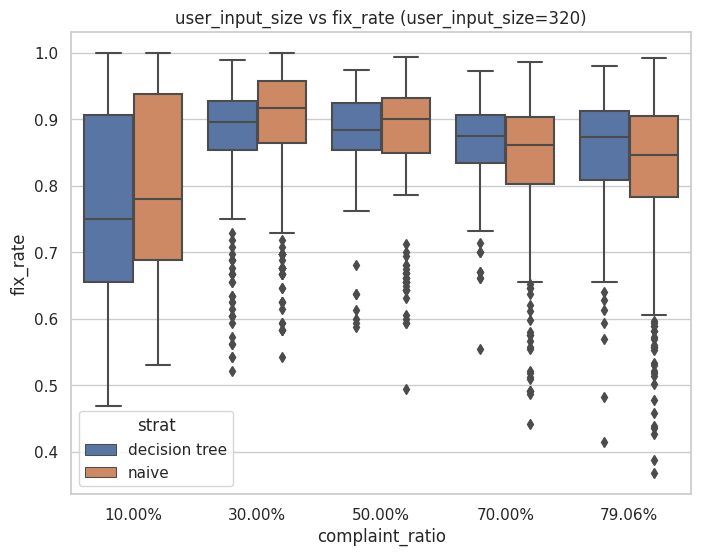

In [211]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df2,x="complaint_ratio",y="fix_rate",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="complaint_ratio", ylabel="fix_rate", 
            title=f'user_input_size vs fix_rate (user_input_size={input_size})')

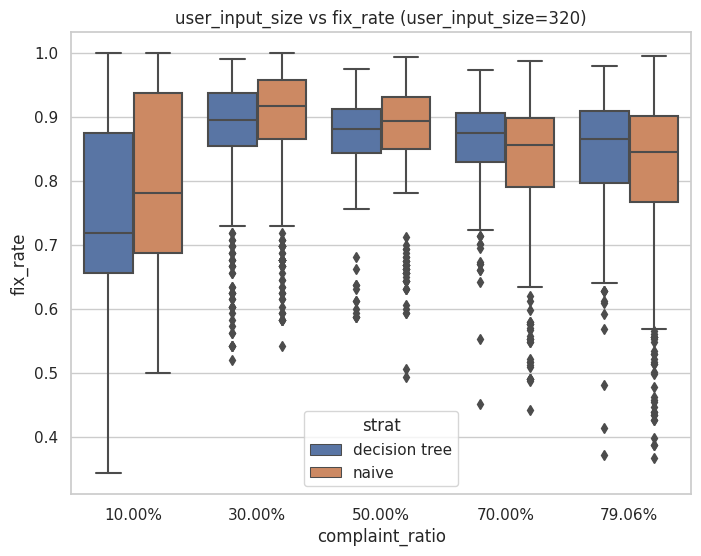

In [212]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df3,x="complaint_ratio",y="fix_rate",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="complaint_ratio", ylabel="fix_rate", 
            title=f'user_input_size vs fix_rate (user_input_size={input_size})')

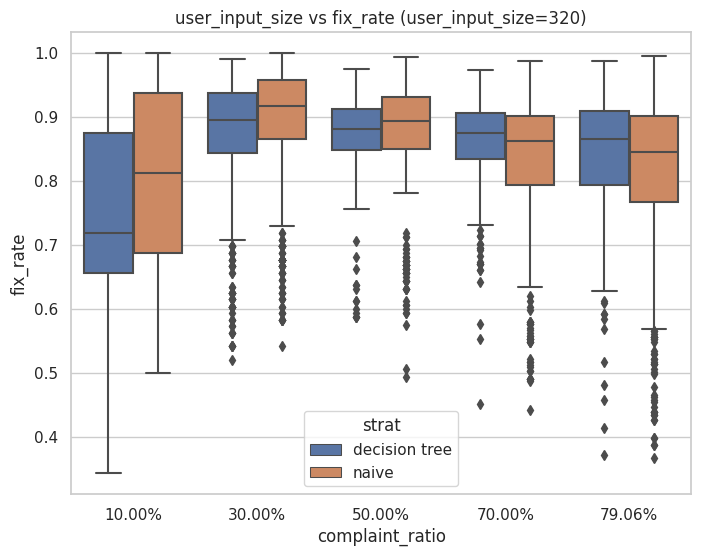

In [213]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df4,x="complaint_ratio",y="fix_rate",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="complaint_ratio", ylabel="fix_rate", 
            title=f'user_input_size vs fix_rate (user_input_size={input_size})')

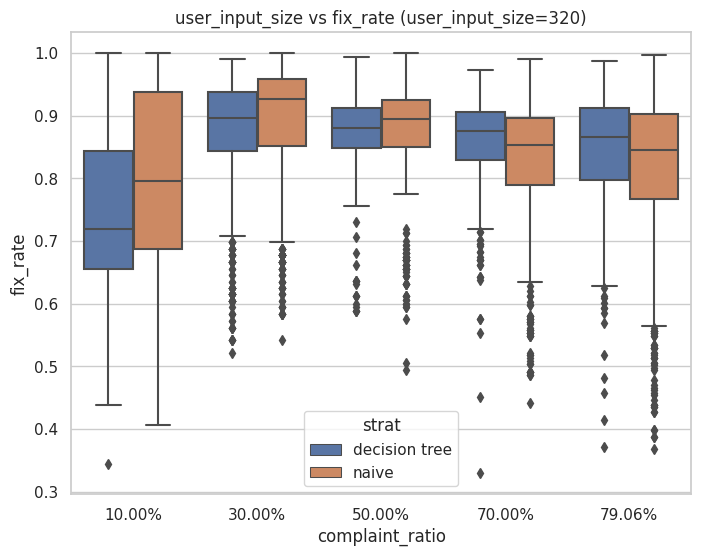

In [214]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df5,x="complaint_ratio",y="fix_rate",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="complaint_ratio", ylabel="fix_rate", 
            title=f'user_input_size vs fix_rate (user_input_size={input_size})')

In [166]:
df_no_deletion.sort_values(by=['strat','complaint_ratio'])[['complaint_ratio','fix_rate','strat',\
                                                            'complaint_reached_max','confirm_reached_max']]

,complaint_ratio,fix_rate,strat,complaint_reached_max,confirm_reached_max
0,10.00%,0.781,decision tree,False,False
0,10.00%,0.594,decision tree,False,False
0,10.00%,0.781,decision tree,False,False
0,10.00%,0.969,decision tree,False,False
0,10.00%,0.812,decision tree,False,False
0,10.00%,0.844,decision tree,False,False
0,10.00%,0.812,decision tree,False,False
0,10.00%,0.938,decision tree,False,False
0,10.00%,0.969,decision tree,False,False
0,10.00%,0.656,decision tree,False,False


In [167]:
df_no_deletion.head()

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,fname,user_input_size,complaint_ratio,accuracy_improvement
0,decision tree,3.391,4.400000,32,288,0.821,0.781,0.993,0.899,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061824_experiment_stats,320,10.00%,1.095006
0,naive,0.922,23.866667,32,288,0.821,0.969,1.000,0.895,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061839_experiment_stats,320,10.00%,1.090134
0,decision tree,6.405,8.466667,96,224,0.821,0.823,1.000,0.933,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061851_experiment_stats,320,30.00%,1.136419
0,naive,0.988,28.333333,96,224,0.821,0.958,1.000,0.884,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061908_experiment_stats,320,30.00%,1.076736
0,decision tree,4.889,8.866667,160,160,0.821,0.781,0.988,0.925,1411,1411,30,0.0,30,29,False,False,../exp_727_repeated_320/20230728061921_experiment_stats,320,50.00%,1.126675


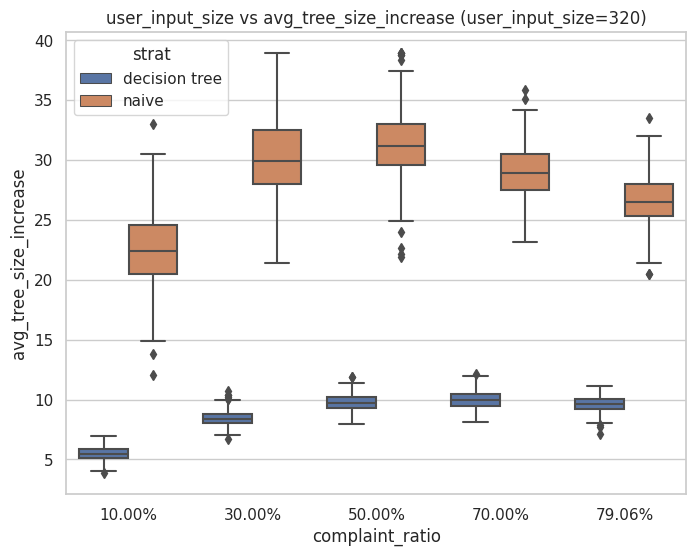

In [168]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df_no_deletion,x="complaint_ratio",y="avg_tree_size_increase",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="complaint_ratio", ylabel="avg_tree_size_increase", 
            title=f'user_input_size vs avg_tree_size_increase (user_input_size={input_size})')

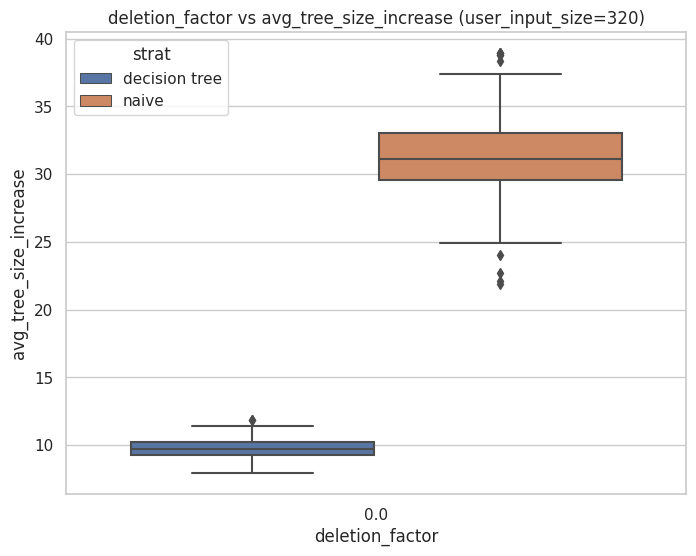

In [169]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df_deletion,x="deletion_factor",y="avg_tree_size_increase",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="deletion_factor", ylabel="avg_tree_size_increase", 
            title=f'deletion_factor vs avg_tree_size_increase (user_input_size={input_size})')


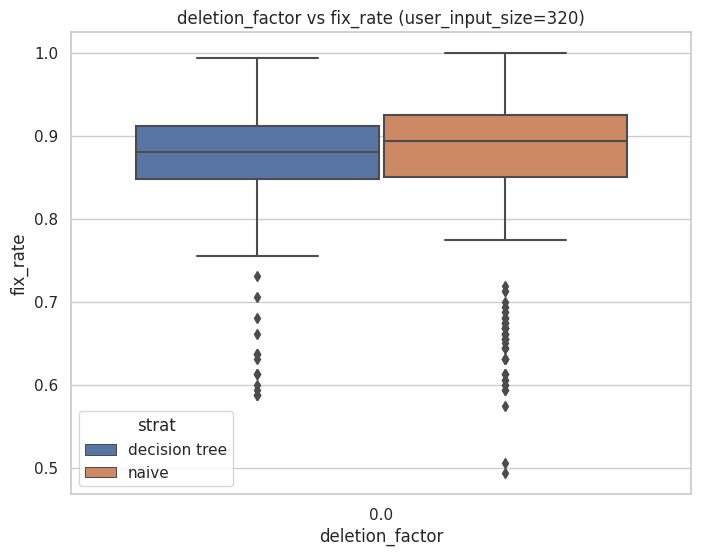

In [170]:
for input_size in list(df['user_input_size'].unique()):
#     line_plots(df=df_diff_user_input_runtime, 
#                x='complaint_ratio', 
#                y='runtime', 
#                xlabel='complaint_ratio',
#                ylabel='runtime(s)', 
#                title=f'user_input_size vs runtime (user_input_size={input_size})',
#                color_assignment_dict=line_color_assignment_dict, 
#                legend_pos='lower center',
#                group_name='user_input_size',
#                group_value=input_size,
#                gtype='general',
#                ylim=None)
    boxplot(df=df_deletion,x="deletion_factor",y="fix_rate",
            group_name='user_input_size',
            group_value=input_size,
            xlabel="deletion_factor", ylabel="fix_rate", 
            title=f'deletion_factor vs fix_rate (user_input_size={input_size})')
